In [1]:
from random_stock_price_generator import RandomStockPrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

In [2]:
rp = RandomStockPrices(num_assets=1000, start_date='1996-01-01', num_days=252*20)
returns = rp.returns
prices = rp.prices

In [3]:
prices.tail()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
2015-04-20,364.610783,2.617713,2.749512,245.991374,20.210485,81.810014,349.202766,12.035157,82.579093,43.494822,...,172.365304,6.392956,159.858764,126.615174,30.121710,142.925735,77.385969,303.469174,435.169115,113.349596
2015-04-21,361.488615,2.620040,2.762809,247.416518,19.836297,82.104603,340.964658,11.928669,82.956710,43.611488,...,173.169939,6.497310,161.124057,130.124222,30.383106,143.351618,77.552390,305.148955,445.033348,114.322841
2015-04-22,359.778339,2.615614,2.761687,248.280031,20.337564,81.465268,329.567314,11.940997,83.214150,42.899498,...,172.831056,6.523931,163.362498,131.817132,30.556270,142.209273,80.125087,308.781931,439.629578,114.842476
2015-04-23,356.148549,2.597054,2.773176,249.329702,20.346948,82.149407,327.032330,12.025287,82.835798,43.581249,...,175.213723,6.624467,164.294423,133.309060,30.112069,141.614526,80.702148,313.752183,438.977064,115.223663
2015-04-24,358.097183,2.614203,2.777062,250.117037,20.611554,82.054361,331.761923,12.070493,83.434819,43.687384,...,175.018953,6.717916,166.665952,134.208691,30.067451,141.922730,80.609273,320.035208,430.941368,114.879688


## Taking a look at the first price path for daily returns

(-0.02867072254662252, 0.27917399794165515)

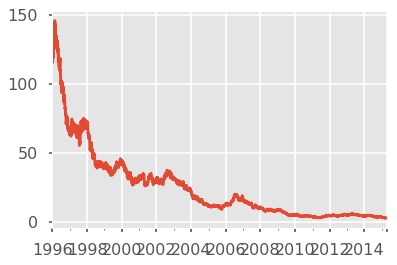

In [4]:
ticker = 'TICK2'
prices[ticker].plot()
rp.distributions[2]

In [5]:
def resample_prices(prices, freq='M'):
    '''
    Resample close prices for each ticker at specified frequency.
    
    Parameters
    ----------
    close_prices : DataFrame
        Close prices for each ticker and date
    freq : str
        What frequency to sample at
        For valid freq choices, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    
    Returns
    -------
    prices_resampled : DataFrame
        Resampled prices for each ticker and date
    '''
    return prices.resample(freq).last()

## Resampling to monthly returns

In [6]:
resampled = resample_prices(prices)
resampled.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
1996-01-31,109.420387,18.033952,135.287825,42.338961,38.875943,34.910574,58.197308,77.388602,45.772689,99.111664,...,14.283624,9.828483,21.903410,61.422759,25.072957,12.382147,22.615242,29.314836,102.946307,137.519493
1996-02-29,110.463895,18.420698,140.763242,41.360688,43.265968,33.667682,62.405631,76.137672,44.979860,93.263379,...,14.097823,9.645161,22.543498,57.920724,24.871978,12.271823,23.639170,30.407623,108.662605,142.989587
1996-03-31,107.431084,18.594518,125.768079,39.707856,46.537673,34.067794,63.014961,75.415228,47.174171,92.102495,...,13.825721,9.578996,21.437432,59.809909,25.072628,12.629119,24.228271,31.585889,108.388104,140.062411
1996-04-30,108.355792,17.882323,123.191904,40.537935,45.004613,33.543635,60.037976,75.950690,44.841035,87.384234,...,13.626996,9.780248,21.187584,59.973955,25.873991,12.713848,23.215467,33.273764,110.086987,131.871246
1996-05-31,107.217173,17.367216,113.134535,36.555826,44.375223,32.862551,56.696314,77.896690,44.869271,75.103036,...,13.893256,10.839701,21.341003,63.900952,26.138541,13.812610,22.351445,34.946017,110.274179,122.617244


## Taking a second look at the first stock with monthly and daily returns

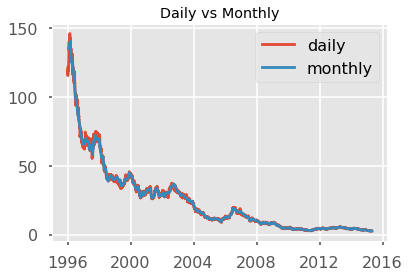

In [7]:
plt.plot(prices.loc[:,ticker])
plt.plot(resampled.loc[:,ticker])
plt.title('Daily vs Monthly')
plt.legend(['daily', 'monthly'])

In [8]:
def compute_log_returns(prices, periods=1):
    '''
    Compute log returns for each ticker.
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    '''
    shifted = prices.shift(periods)
    return np.log(prices/shifted).dropna()

In [9]:
log_returns = compute_log_returns(resampled)
log_returns.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
1996-02-29,0.009491,0.021219,0.039675,-0.023377,0.106991,-0.036251,0.069816,-0.016296,-0.017473,-0.060820,...,-0.013093,-0.018828,0.028804,-0.058705,-0.008048,-0.008950,0.044281,0.036600,0.054040,0.039006
1996-03-31,-0.027839,0.009392,-0.112640,-0.040782,0.072896,0.011814,0.009717,-0.009534,0.047632,-0.012525,...,-0.019490,-0.006884,-0.050308,0.032096,0.008035,0.028699,0.024615,0.038017,-0.002529,-0.020684
1996-04-30,0.008571,-0.039054,-0.020696,0.020689,-0.033497,-0.015505,-0.048395,0.007075,-0.050723,-0.052587,...,-0.014478,0.020792,-0.011723,0.002739,0.031462,0.006687,-0.042701,0.052059,0.015553,-0.060262
1996-05-31,-0.010564,-0.029228,-0.085166,-0.103398,-0.014084,-0.020513,-0.057268,0.025299,0.000630,-0.151454,...,0.019351,0.102851,0.007215,0.063424,0.010173,0.082890,-0.037928,0.049035,0.001699,-0.072758
1996-06-30,-0.009099,-0.023257,-0.119572,-0.003533,-0.016680,0.047419,0.030232,-0.017567,-0.008156,0.044935,...,0.022511,0.071840,0.110113,0.050559,-0.078273,0.007327,-0.014604,0.000234,0.069536,0.014701


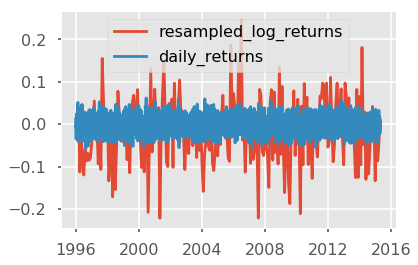

In [10]:
plt.plot(log_returns.loc[:, ticker])
plt.plot(returns.loc[:, ticker])
plt.legend(['resampled_log_returns', 'daily_returns'])

## Previous and Lookahead returns

In [11]:
previous_returns = compute_log_returns(resampled, 12).shift(1).dropna()
lookahead_returns = log_returns.shift(-1).dropna()

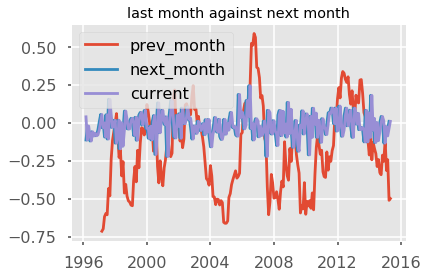

In [12]:
plt.plot(previous_returns.loc[:, ticker])
plt.plot(lookahead_returns.loc[:, ticker])
plt.plot(log_returns.loc[:, ticker])
plt.title('last month against next month')
plt.legend(['prev_month', 'next_month', 'current'])

## Generate Trading Signal
We will use previous returns to determine which stocks to buy and which to sell

In [13]:
def get_top_n(prev_returns, top_n):
    '''
    Select the top performing stocks.
    
    Parameters
    ----------
    prev_returns: pd.DataFrame
        previous shifted returns for each ticker and date
    top_n: int
        The number of top performing stocks to get
        
    Returns
    -------
    top_stocks: pd.DataFrame
        Top <top_n> stocks for each day marked with a 1
    '''
    top_stocks = prev_returns.copy()
    for index, row in prev_returns.iterrows():
        top_returns = row.nlargest(top_n).index
        # set all to zero
        top_stocks.loc[index] = 0
        
        for x in top_returns:
            top_stocks.at[index, x] = 1

    return top_stocks.astype('int64')

Text(0.5, 1.0, 'Most Shorted Stocks')

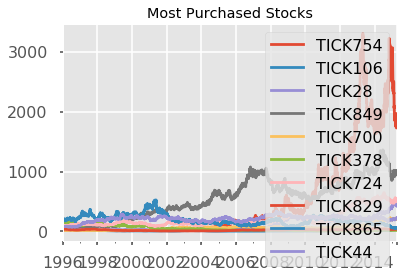

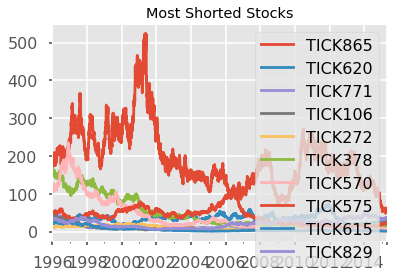

In [14]:
n_stocks = 1
long_stocks = get_top_n(previous_returns, n_stocks)
short_stocks = get_top_n(-1*previous_returns, n_stocks)

top_tickers = long_stocks.sum().nlargest(10)  
worst_tickers = short_stocks.sum().nlargest(10)
prices[top_tickers.index].plot()
plt.title('Most Purchased Stocks')
prices[worst_tickers.index].plot()
plt.title('Most Shorted Stocks')

## Checking results

In [15]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    '''
    Compute expected returns for the portfolio assuming equal investment in each long/short stock
    
    Parameters
    ----------
    df_long: pd.DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short: pd.DataFrame
        Worst stocks for each ticker and date marked with a 1
    lookahead_returns: pd.DataFrame
        contains returns for the next period on the current day
    n_stocks: int
        The number of stocks chosen for each month
        
    Returns
    -------
    portfolio_returns: pd.DataFrame
        Expected portfolio returns for each ticker and date
    '''
    
    longs = df_long * lookahead_returns
    shorts = df_short * -lookahead_returns
    result = (longs + shorts).dropna()
    return result/n_stocks

Text(0.5, 1.0, 'Total returns each day')

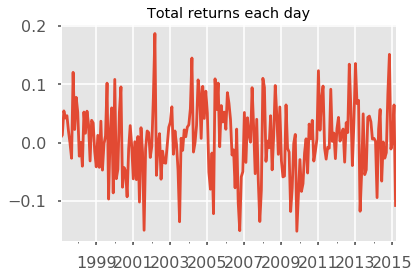

In [16]:
port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
port_returns.T.sum().dropna().plot()
plt.title('Total returns each day')

## Statistical Tests

In [17]:
expected_portfolio_returns_by_date = port_returns.sum(axis=1).dropna()
expected_portfolio_returns_by_date.head()

1997-02-28    0.008682
1997-03-31    0.012878
1997-04-30    0.054194
1997-05-31    0.041927
1997-06-30    0.045911
Freq: M, dtype: float64

In [18]:
portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
print('''
Mean Daily Return:     {:.6f}
Standard Error:        {:.6f}
Annual Rate of Return: {:.2f}%
'''.format(portfolio_mean_ret, portfolio_ste_ret, annualized_mean_return))


Mean Daily Return:     0.004974
Standard Error:        0.004116
Annual Rate of Return: 6.15%



### T-Test
My null hypothesis ($H_0$) is that the actual mean return from the signal is zero. I'll perform a one-sample, one-sided t-test on the observed mean return, to see if I can reject $H_0$.

I'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, I'll use $\alpha = 0.05$, since it's a common value to use.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so I'll divide the p-value by 2 to get 1-sided p-value

In [19]:
from scipy import stats

def analyze_alpha(expected_portfolio_returns_by_date):
    '''
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    expected_portfolio_returns_by_date: pd.DataFrame
        Expected portfolio returns by date
        
    Returns
    -------
    t_value: float
        T-statistic from the t-test
    p_value: float
        Corresponding p-value
    '''
    
    t, p = stats.ttest_1samp(expected_portfolio_returns_by_date, 0.0)
    return t, p/2

In [20]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print('''
Alpha analysis:
    t-value:     {:.3f}
    p-value:     {:.3f}
'''.format(t_value, p_value))


Alpha analysis:
    t-value:     1.208
    p-value:     0.114



## Results
The returns and p-values are not impressive and show there is no alpha here. Using the RandomStockPrices generator with a default mean of 0.05 and default standard deviation of all of the underlying distributions being from 0.10 to 0.50.

Next I will put all of the above into one function, where I can tweak the random price distributions and lower the standard deviation range from (0.10, 0.50) to (0.01, 0.05). This should produce better results.

In [21]:
def momentum_test(n_stocks=10, samples=10):
    '''
    Function to combine all of the above and where we can manipulate the underlying stock distributions and 
    prints the results after running <samples> simulations
    
    Parameters
    ----------
    stock_universe_dist_mean: float
        the mean of all of the stock return distributions' means
    n_stocks: int
        the number of stocks to buy(sell) each period
    freq: string
        frequency of rebalancing
        
    Returns
    -------
    None
    '''
    port_daily_returns_mean = []
    port_daily_standard_error = []
    port_annual_return = []
    t_values = []
    p_values = []
    
    for i in range(samples):
        rp = RandomStockPrices(num_assets=1000, start_date='1996-01-01', num_days=252*20)
        prices = rp.prices
        resampled_returns = resample_prices(prices, freq='M')
        log_returns = compute_log_returns(resampled_returns)
        previous_returns = log_returns.shift(1).dropna()
        lookahead_returns = log_returns.shift(-1).dropna()
        long_stocks = get_top_n(previous_returns, n_stocks)
        short_stocks = get_top_n(-1*previous_returns, n_stocks)
        port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
        expected_portfolio_returns_by_date = port_returns.sum(axis=1).dropna()
        portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
        portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
        annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
        t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
        port_daily_returns_mean.append(portfolio_mean_ret)
        port_daily_standard_error.append(portfolio_ste_ret)
        port_annual_return.append(annualized_mean_return)
        t_values.append(t_value)
        p_values.append(p_value)
    print('''
    Mean Daily Return:     {:.6f}
    Standard Error:        {:.6f}
    Annual Rate of Return: {:.2f}%
    '''.format(np.mean(port_daily_returns_mean), np.mean(port_daily_standard_error), np.mean(port_annual_return)))

    print('''
    Alpha analysis:
        t-value:     {:.3f}
        p-value:     {:.3f}
    '''.format(np.mean(t_values), np.mean(p_value)))

In [22]:
# First test, the usual parameters
momentum_test(n_stocks=10)


    Mean Daily Return:     0.001176
    Standard Error:        0.001040
    Annual Rate of Return: 1.42%
    

    Alpha analysis:
        t-value:     1.135
        p-value:     0.183
    


In [23]:
# changing to daily it looks worse... this takes a while and doesn't produce good results
#momentum_test(stock_universe_dist_mean=0.05, n_stocks=10, freq='D', samples=10)

In [24]:
# changing to only 1 stock
momentum_test(n_stocks=1)


    Mean Daily Return:     -0.001792
    Standard Error:        0.003617
    Annual Rate of Return: -2.07%
    

    Alpha analysis:
        t-value:     -0.497
        p-value:     0.314
    


In [25]:
# Changing to trading the entire universe greatly reduces the standard error
momentum_test(n_stocks=500)


    Mean Daily Return:     0.000355
    Standard Error:        0.000104
    Annual Rate of Return: 0.43%
    

    Alpha analysis:
        t-value:     3.421
        p-value:     0.000
    


In [26]:
momentum_test(n_stocks=100)


    Mean Daily Return:     0.000617
    Standard Error:        0.000275
    Annual Rate of Return: 0.74%
    

    Alpha analysis:
        t-value:     2.245
        p-value:     0.039
    


## Modification to make it use more historical data

In [27]:
def momentum_test(n_stocks=10, periods_lookback=1, samples=10):
    '''
    Function to combine all of the above and where we can manipulate the underlying stock distributions and 
    prints the results after running <samples> simulations
    
    Parameters
    ----------
    stock_universe_dist_mean: float
        the mean of all of the stock return distributions' means
    n_stocks: int
        the number of stocks to buy(sell) each period
    freq: string
        frequency of rebalancing
        
    Returns
    -------
    None
    '''
    port_daily_returns_mean = []
    port_daily_standard_error = []
    port_annual_return = []
    t_values = []
    p_values = []
    
    for i in range(samples):
        rp = RandomStockPrices(num_assets=1000, start_date='1996-01-01', num_days = 2520*2)
        prices = rp.prices
        resampled_prices = resample_prices(prices, freq='M')
        log_returns = compute_log_returns(resampled_prices)
        previous_returns = compute_log_returns(resampled_prices, periods_lookback).shift(1).dropna()
        lookahead_returns = log_returns.shift(-1)
        long_stocks = get_top_n(previous_returns, n_stocks)
        short_stocks = get_top_n(-1*previous_returns, n_stocks)
        port_returns = portfolio_returns(long_stocks, short_stocks, lookahead_returns, n_stocks*2)
        expected_portfolio_returns_by_date = port_returns.sum(axis=1)
        portfolio_mean_ret = expected_portfolio_returns_by_date.mean()
        portfolio_ste_ret = expected_portfolio_returns_by_date.sem()
        annualized_mean_return = (np.exp(portfolio_mean_ret*12) - 1) * 100
        t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
        port_daily_returns_mean.append(portfolio_mean_ret)
        port_daily_standard_error.append(portfolio_ste_ret)
        port_annual_return.append(annualized_mean_return)
        t_values.append(t_value)
        p_values.append(p_value)
    print('''
    Mean Daily Return:     {:.6f}
    Standard Error:        {:.6f}
    Annual Rate of Return: {:.2f}%
    '''.format(np.mean(port_daily_returns_mean), np.mean(port_daily_standard_error), np.mean(port_annual_return)))

    print('''
    Alpha analysis:
        t-value:     {:.3f}
        p-value:     {:.3f}
    '''.format(np.mean(t_values), np.mean(p_value)))

In [28]:
momentum_test(n_stocks=500, periods_lookback=120)


    Mean Daily Return:     0.002432
    Standard Error:        0.000149
    Annual Rate of Return: 2.96%
    

    Alpha analysis:
        t-value:     16.427
        p-value:     0.000
    


In [29]:
momentum_test(n_stocks=500, periods_lookback=12)


    Mean Daily Return:     0.001158
    Standard Error:        0.000106
    Annual Rate of Return: 1.40%
    

    Alpha analysis:
        t-value:     10.976
        p-value:     0.000
    


In [30]:
momentum_test(n_stocks=500, periods_lookback=24)


    Mean Daily Return:     0.001529
    Standard Error:        0.000108
    Annual Rate of Return: 1.85%
    

    Alpha analysis:
        t-value:     14.152
        p-value:     0.000
    


In [31]:
momentum_test(n_stocks=500, periods_lookback=36)


    Mean Daily Return:     0.001761
    Standard Error:        0.000116
    Annual Rate of Return: 2.14%
    

    Alpha analysis:
        t-value:     15.185
        p-value:     0.000
    


In [32]:
momentum_test(n_stocks=500, periods_lookback=48)


    Mean Daily Return:     0.001971
    Standard Error:        0.000115
    Annual Rate of Return: 2.39%
    

    Alpha analysis:
        t-value:     17.167
        p-value:     0.000
    


In [34]:
momentum_test(n_stocks=500, periods_lookback=60)


    Mean Daily Return:     0.002020
    Standard Error:        0.000123
    Annual Rate of Return: 2.45%
    

    Alpha analysis:
        t-value:     16.482
        p-value:     0.000
    


In [35]:
momentum_test(n_stocks=100, periods_lookback=120)


    Mean Daily Return:     0.005294
    Standard Error:        0.000360
    Annual Rate of Return: 6.56%
    

    Alpha analysis:
        t-value:     14.730
        p-value:     0.000
    
